# Data Cleaning and Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data from CSV file

In [2]:
df=pd.read_csv('C:\\Users\\gopal\\OneDrive\\Desktop\\Test Jupyter\\train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


## Checking data types in DataFrame

In [3]:
df.dtypes

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object

## Dropping unwanted columns

In [4]:
df= df.drop(["zero","zero.1","zero.2","zero.3","zero.4","zero.5","zero.6","zero.7","zero.8","zero.9","zero.10","zero.11","zero.12","zero.13","zero.14","zero.15","zero.16","zero.17","zero.18"], axis=1)
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


## Renaming Columns

In [5]:
df= df.rename(columns={"2urvived":"Survived"})
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


Abbrevations used:
1.sibsp- Number of Siblings/Spouses Aboard
2.Parch - Number of Parents/Children Aboard.
3.Pclass- Passenger class
4.Embarked- Where the traveler mounted from

## Checking Rows and Columns of DataFrame

In [6]:
df.shape

(1309, 9)

## Checking for Duplicate rows in the DataFrame

In [7]:
df_duplicates = df[df.duplicated()]
print("Number of duplicate rows is" , df_duplicates)

Number of duplicate rows is Empty DataFrame
Columns: [Passengerid, Age, Fare, Sex, sibsp, Parch, Pclass, Embarked, Survived]
Index: []


In [8]:
df.count()

Passengerid    1309
Age            1309
Fare           1309
Sex            1309
sibsp          1309
Parch          1309
Pclass         1309
Embarked       1307
Survived       1309
dtype: int64

## Dropping duplicate rows

In [9]:
df = df.drop_duplicates()

In [10]:
df.count()

Passengerid    1309
Age            1309
Fare           1309
Sex            1309
sibsp          1309
Parch          1309
Pclass         1309
Embarked       1307
Survived       1309
dtype: int64

## Dropping null rows

In [11]:
df = df.dropna()

In [12]:
df.shape

(1307, 9)

In [13]:
df.count()

Passengerid    1307
Age            1307
Fare           1307
Sex            1307
sibsp          1307
Parch          1307
Pclass         1307
Embarked       1307
Survived       1307
dtype: int64

## Checking Correlation between columns

In [14]:
corr = df.corr()

In [15]:
corr

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
Passengerid,1.000000,0.025792,0.031945,-0.012297,-0.055696,0.008576,-0.039776,-0.051518,-0.331125
Age,0.025792,1.000000,0.176554,-0.057161,-0.189332,-0.125112,-0.375811,-0.065125,-0.060236
Fare,0.031945,0.176554,1.000000,0.184192,0.161141,0.222422,-0.557915,-0.239212,0.171942
Sex,-0.012297,-0.057161,0.184192,1.000000,0.110768,0.214371,-0.121826,-0.099408,0.401985
sibsp,-0.055696,-0.189332,0.161141,0.110768,1.000000,0.373383,0.059819,0.066055,-0.013174
Parch,0.008576,-0.125112,0.222422,0.214371,0.373383,1.000000,0.017304,0.045216,0.056183
Pclass,-0.039776,-0.375811,-0.557915,-0.121826,0.059819,0.017304,1.000000,0.187349,-0.241672
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
Survived,-0.331125,-0.060236,0.171942,0.401985,-0.013174,0.056183,-0.241672,-0.093225,1.000000


Observations:
Correlation between all the columns is very bad.

In [16]:
df['Survived'].value_counts()

Survived
0    967
1    340
Name: count, dtype: int64

In [17]:
df['Sex'].value_counts()

Sex
0    843
1    464
Name: count, dtype: int64

In [18]:
df['Embarked'].value_counts()

Embarked
2.0    914
0.0    270
1.0    123
Name: count, dtype: int64

## Data Visualization

In [19]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

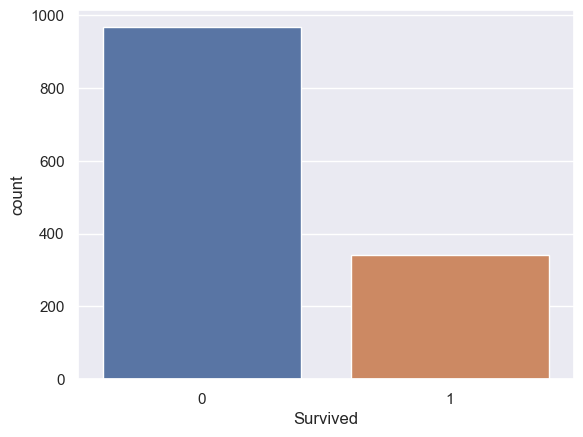

In [20]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

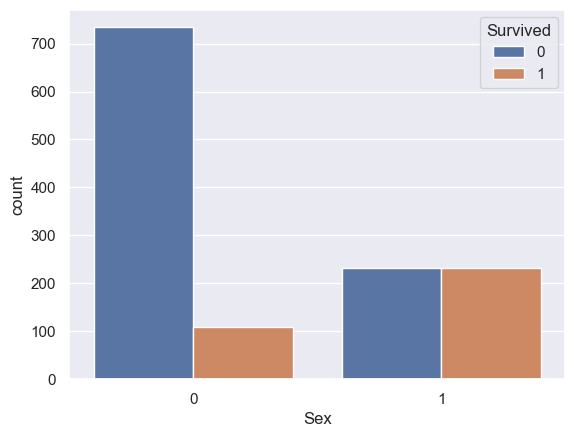

In [21]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

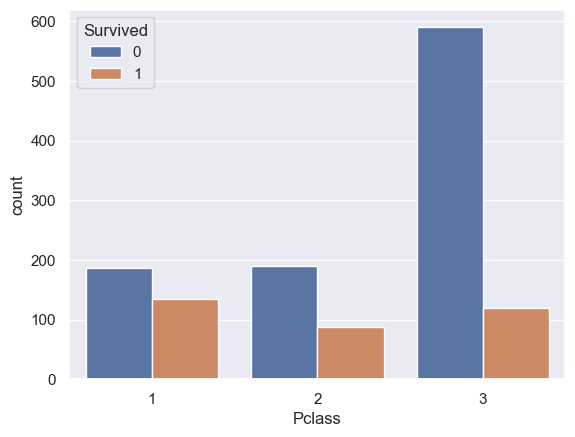

In [22]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Age', ylabel='Survived'>

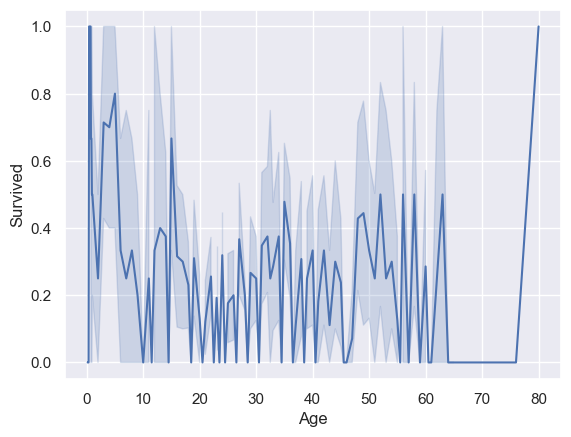

In [23]:
sns.lineplot(x='Age', y='Survived',data=df)

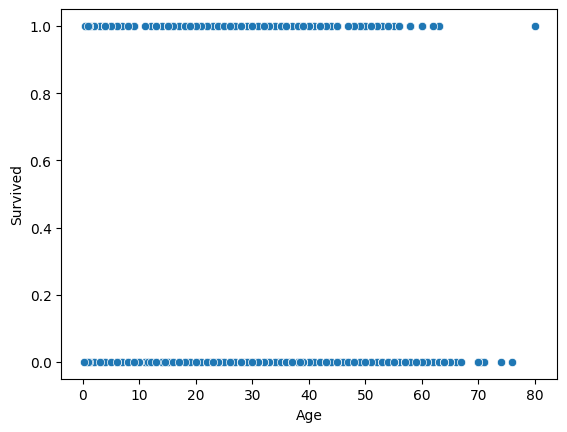

In [21]:
sns.scatterplot(x='Age',y='Survived',data=df)
plt.show()

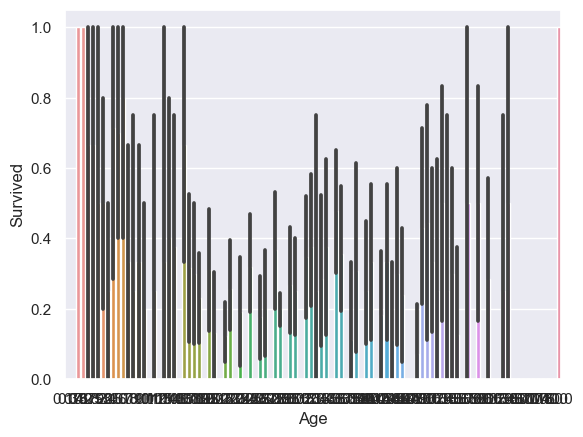

In [24]:
sns.barplot(x='Age',y='Survived',data=df)
plt.show()

In [25]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,655.319816,29.471821,33.209595,0.355011,0.499617,0.385616,2.296863,1.492731,0.260138
std,377.922205,12.881592,51.748768,0.478700,1.042273,0.866092,0.836942,0.814626,0.438877
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.500000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.500000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000
